In [1]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np

In [2]:
df=pd.read_csv('Raw_First_Value.csv')

#피쳐 변수 설정
feature_names= ['obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(df, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(df, columns=["pov"] )
#상수항 설정
dfX = sm.add_constant(dfX0)


In [3]:
df.tail()

,team,year,month,pov,obp,slg,ba,era,whip
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40
533,10,2022,5,0.385,0.318,0.387,0.251,6.51,1.67


In [4]:
df.columns

Index(['team', 'year', 'month', 'pov', 'obp', 'slg', 'ba', 'era', 'whip'], dtype='object')

In [6]:
#회귀분석
model_baseball = sm.OLS(dfy, dfX)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    pov   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.05e-78
Time:                        14:24:21   Log-Likelihood:                 370.04
No. Observations:                 534   AIC:                            -728.1
Df Residuals:                     528   BIC:                            -702.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1741      0.080      2.187      0.0

In [7]:
this_year_score=pd.DataFrame( pd.read_csv('2022yearcumul01.csv') )

In [8]:
this_year_score

,team,OBP,SLG,BA,ERA,WHIP,POV,이름
0,9,0.350,0.409,0.269,4.03,1.34,0.542,기아
1,4,0.340,0.392,0.264,3.78,1.36,0.567,lg
2,5,0.326,0.365,0.246,3.49,1.26,0.600,키움
3,6,0.330,0.370,0.249,3.56,1.21,0.661,ssg
4,2,0.331,0.357,0.256,4.12,1.42,0.483,두산
5,1,0.326,0.352,0.247,3.58,1.24,0.475,kt
6,7,0.320,0.363,0.248,3.85,1.36,0.383,nc
7,3,0.321,0.365,0.260,3.86,1.39,0.483,삼성
8,10,0.317,0.355,0.242,5.30,1.53,0.361,한화
9,8,0.313,0.366,0.254,4.03,1.36,0.448,롯데


In [9]:
this_year_score = this_year_score.drop(['이름'], axis=1)

In [189]:
pov22=[]
pov22_pred=[]
pov22_team=[]
for idx, row in this_year_score.iterrows():
    row['const'] =1
    
    a= result_baseball_ols.predict(     row[ ['const', 'OBP','SLG','BA','ERA','WHIP' ]]    )
    print('예측값: ', round( a[0],3), end='    ')
    pov22_pred.append(round( a[0],3))
    b= this_year_score['POV'][idx]
    print('실제값: ',b)
    pov22.append(b)
    c=row['team']
    print(c)
    pov22_team.append(c)

예측값:  0.57    실제값:  0.542
9.0
예측값:  0.556    실제값:  0.567
4.0
예측값:  0.55    실제값:  0.6
5.0
예측값:  0.557    실제값:  0.661
6.0
예측값:  0.472    실제값:  0.483
2.0
예측값:  0.526    실제값:  0.475
1.0
예측값:  0.497    실제값:  0.383
7.0
예측값:  0.481    실제값:  0.483
3.0
예측값:  0.356    실제값:  0.361
10.0
예측값:  0.463    실제값:  0.448
8.0


In [12]:
pov22,pov22_pred

([0.542, 0.567, 0.6, 0.661, 0.483, 0.475, 0.383, 0.483, 0.361, 0.448],
 [0.57, 0.556, 0.55, 0.557, 0.472, 0.526, 0.497, 0.481, 0.356, 0.463])

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
%matplotlib inline
from matplotlib import rc 
rc('font', family='Malgun Gothic')

In [15]:
pov22

[0.542, 0.567, 0.6, 0.661, 0.483, 0.475, 0.383, 0.483, 0.361, 0.448]

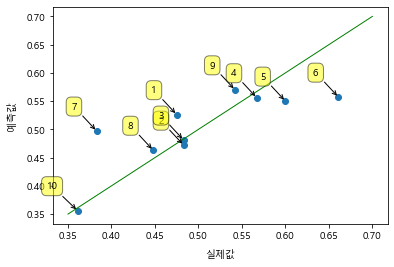

In [16]:
scatter =plt.scatter(pov22, pov22_pred ) 
plt.xlabel('실제값',labelpad=10)
plt.ylabel('예측값', labelpad=10)
plt.plot([0.35, 0.7], [0.35, 0.7],color="green", lw='1')
for label, x, y in zip(this_year_score['team'], pov22, pov22_pred):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20) , textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')) 

plt.show()

<AxesSubplot:>

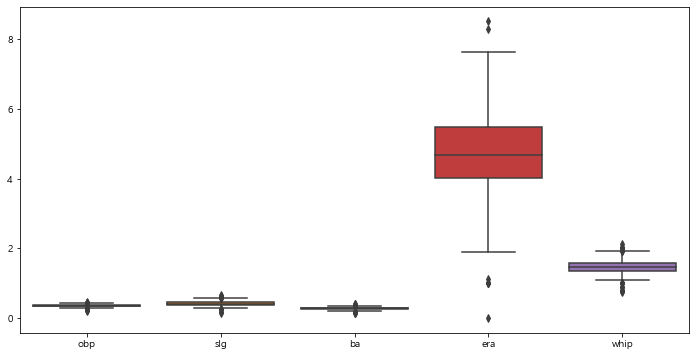

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[feature_names] )

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm=MinMaxScaler()
ss=StandardScaler()
rs=RobustScaler()
from sklearn.preprocessing import Normalizer

nor = Normalizer()
dfy_nor = nor.fit_transform(dfy)
dfX_nor = nor.fit_transform(dfX)

In [148]:
from sklearn.model_selection import train_test_split
X=dfX_nor
y=dfy

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [149]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [150]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test=reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Train Data: ', rmse_test)

RMSE of Train Data:  0.12282031161685443
RMSE of Train Data:  0.11445463408840069


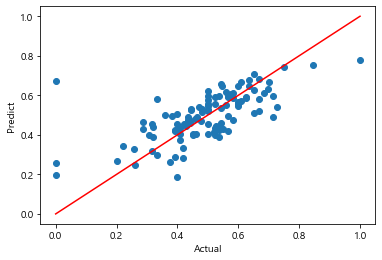

In [151]:
plt.scatter(y_test, pred_test )
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0, 1], [0, 1], 'r')


위의 모델은 실제값 0부근에서 유독 높은 예측을 하는 경향이 있다.... 아무래도 게임 경기가 매우 적은 달 때문인듯하다


In [188]:
from sklearn.model_selection import train_test_split

rs=RobustScaler()

dfX_rs= rs.fit_transform(dfX)
X=dfX_rs
y=dfy

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=13)

reg=LinearRegression()
reg.fit(X_train, y_train)
rs_reg_model = reg.fit(X_train, y_train)
pred_tr = reg.predict(X_train)
pred_test=reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Train Data: ', rmse_test)

RMSE of Train Data:  0.12254116302401723
RMSE of Train Data:  0.11931038371115013


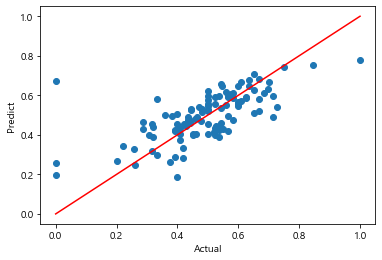

In [153]:
plt.scatter(y_test, pred_test )
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0, 1], [0, 1], 'r')